In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.shape

(200, 4)

In [6]:
df.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [7]:
df.isnull().sum()*100/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

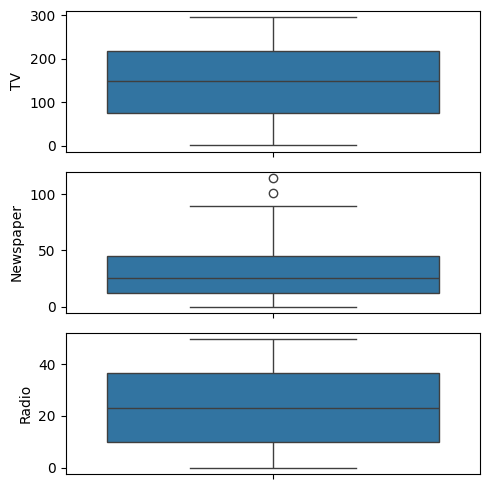

In [8]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

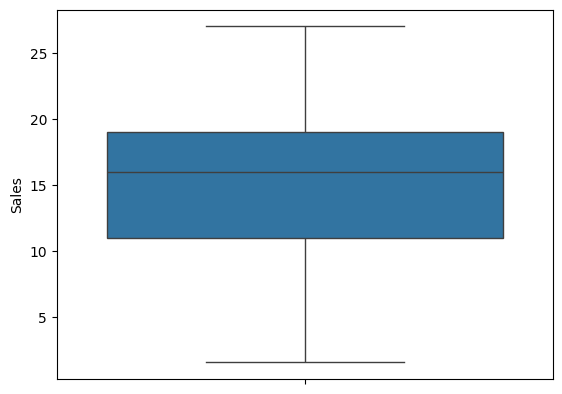

In [9]:
sns.boxplot(df['Sales'])
plt.show()

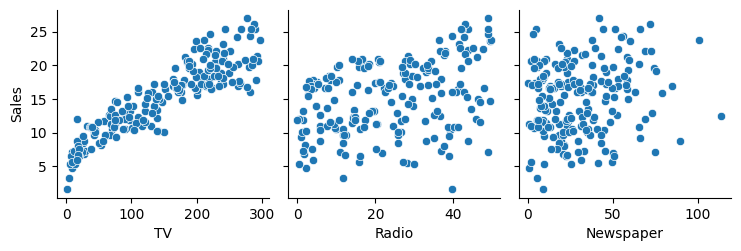

In [10]:
sns.pairplot(df, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

<Axes: ylabel='Frequency'>

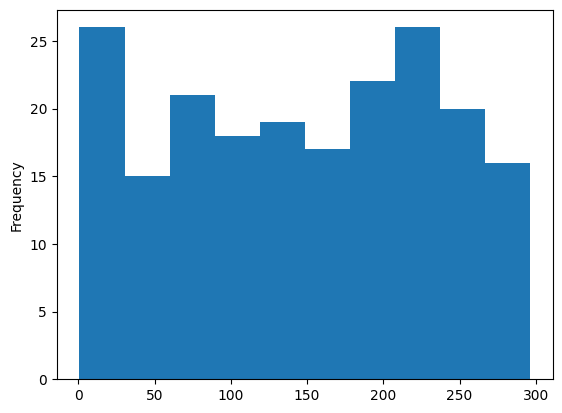

In [11]:
df['TV'].plot.hist(bins=10)

<Axes: xlabel='TV'>

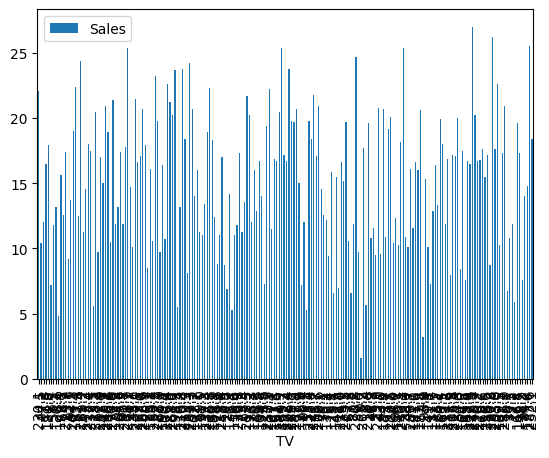

In [12]:
df.plot(x='TV', y='Sales', kind = 'bar')

<Axes: xlabel='Radio', ylabel='Frequency'>

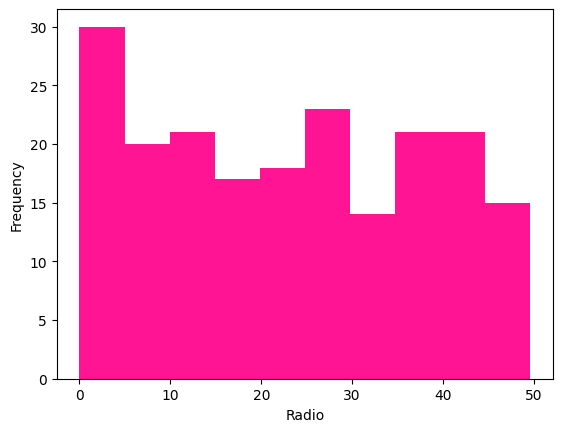

In [13]:
df['Radio'].plot.hist(bins=10, color="deeppink", xlabel="Radio")

<Axes: xlabel='Radio'>

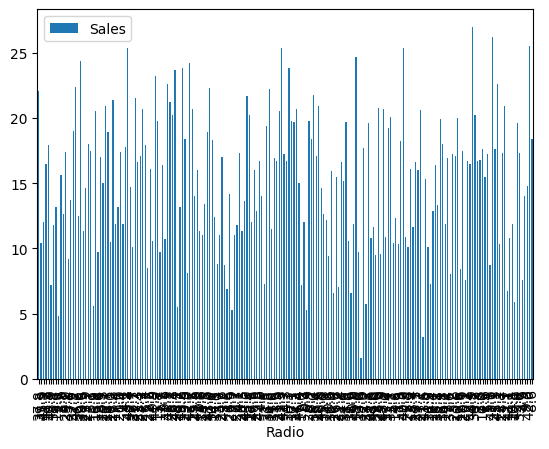

In [14]:
df.plot(x='Radio', y='Sales', kind = 'bar')

<Axes: xlabel='newspaper', ylabel='Frequency'>

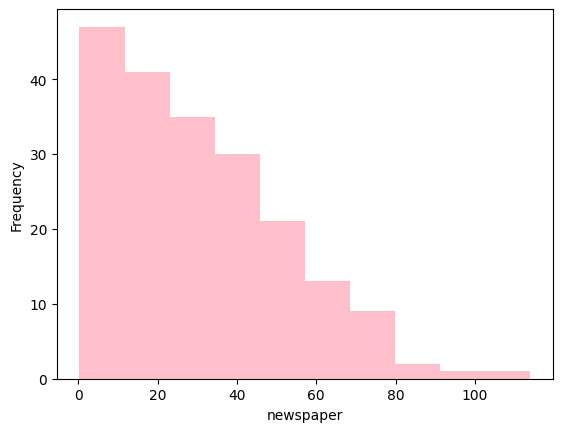

In [15]:
df['Newspaper'].plot.hist(bins=10,color="pink", xlabel="newspaper")

<Axes: xlabel='Newspaper'>

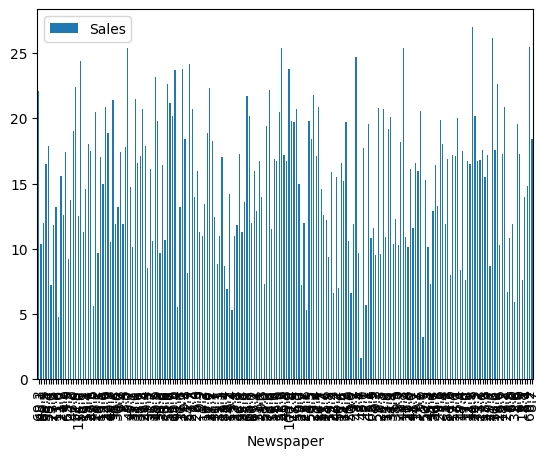

In [16]:
df.plot(x='Newspaper', y='Sales', kind = 'bar')

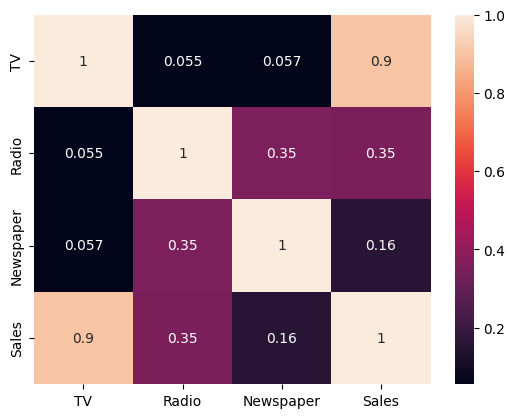

In [17]:
sns.heatmap(df.corr(),annot = True)
plt.show()

In [18]:
X = df['TV']
y = df['Sales']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
X_train.head(5)

79     116.0
197    177.0
38      43.1
24      62.3
122    224.0
Name: TV, dtype: float64

In [21]:
y_train.head(5)

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

In [22]:
X_test.head(5)

95     163.3
15     195.4
30     292.9
158     11.7
128    220.3
Name: TV, dtype: float64

In [23]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

In [24]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

In [25]:
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
res= model.predict(X_test)
print(res)

[[16.06747317]
 [17.84847567]
 [23.25806271]
 [ 7.65625887]
 [19.23000098]
 [11.17387752]
 [19.03581067]
 [ 9.78125562]
 [19.34651516]
 [16.72217191]
 [ 8.75482116]
 [10.12524988]
 [20.01785878]
 [ 7.30671633]
 [14.74697911]
 [16.45030549]
 [ 7.41213392]
 [17.97053815]
 [11.18497411]
 [20.17875932]
 [19.74044406]
 [10.76885203]
 [ 9.1154603 ]
 [20.92777906]
 [10.83543156]
 [ 9.97544593]
 [18.85271696]
 [14.73588252]
 [11.84522114]
 [ 7.47316516]
 [18.09260063]
 [10.84652815]
 [18.04266598]
 [ 7.94477018]
 [22.58117079]
 [20.22314567]
 [ 9.68693462]
 [22.19279018]
 [13.50970946]
 [ 8.53288939]]


In [28]:
model.coef_

array([[0.05548294]])

In [29]:
model.intercept_

array([7.00710843])

In [30]:
0.05548294 * 69.2 + 7.00710843

10.846527878

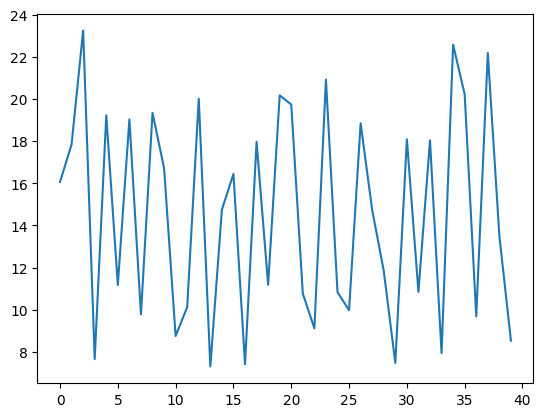

In [31]:
plt.plot(res)

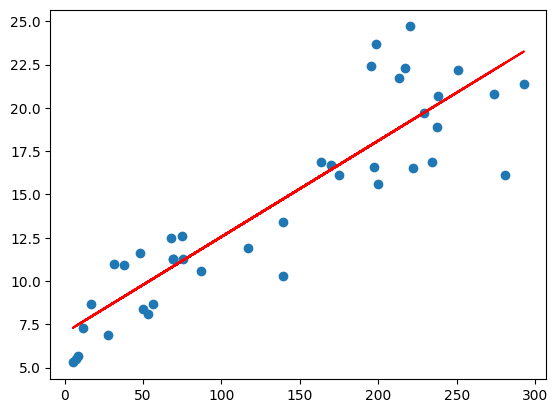

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.00710843 + 0.05548294 * X_test, 'r')
plt.show()

In [33]:
X1 = df['Radio']
y1 = df['Sales']

In [34]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [35]:
X1_train = X1_train.values.reshape(-1, 1)
y1_train = y1_train.values.reshape(-1, 1)
X1_test = X1_test.values.reshape(-1, 1)
y1_test = y1_test.values.reshape(-1, 1)

In [36]:
model1 = LinearRegression()
model1.fit(X1_train,y1_train)

LinearRegression()

In [37]:
res1 = model1.predict(X1_test)
print(res1)

[[16.37755992]
 [18.30957824]
 [15.98155617]
 [17.01356595]
 [18.46557972]
 [16.78556379]
 [17.85357392]
 [13.97753717]
 [12.99352785]
 [15.28554957]
 [15.53755196]
 [13.26953046]
 [12.99352785]
 [16.17355799]
 [12.83752637]
 [13.52153285]
 [15.95755594]
 [15.38155048]
 [15.02154707]
 [15.88555526]
 [16.46156072]
 [16.97756561]
 [17.42156982]
 [16.9655655 ]
 [13.70153456]
 [12.82552625]
 [17.74557289]
 [14.32554047]
 [14.0015374 ]
 [15.84955492]
 [12.89752694]
 [15.0455473 ]
 [18.51358017]
 [17.82957369]
 [14.25353979]
 [16.701563  ]
 [18.22557744]
 [16.05355685]
 [14.3495407 ]
 [12.7775258 ]]


In [38]:
model1.coef_

array([[0.12000114]])

In [39]:
model1.intercept_

array([12.58552398])

In [43]:
0.12000114 * 69.2 + 12.58552398

20.889602868

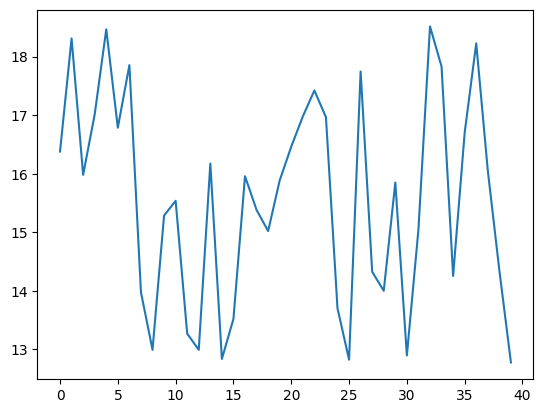

In [44]:
plt.plot(res1)

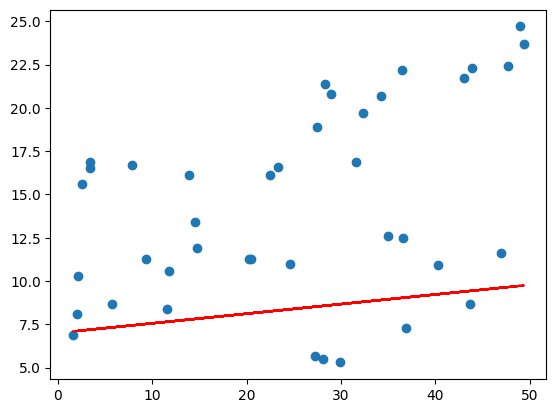

In [45]:
plt.scatter(X1_test, y1_test)
plt.plot(X1_test, 7.00710843 + 0.05548294 * X1_test, 'r')
plt.show()

In [49]:
X2 = df['Newspaper']
y2 = df['Sales']

In [50]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)
X2_train = X2_train.values.reshape(-1, 1)
y2_train = y2_train.values.reshape(-1, 1)
X2_test = X2_test.values.reshape(-1, 1)
y2_test = y2_test.values.reshape(-1, 1)

In [51]:
model2 = LinearRegression()
model2.fit(X2_train,y2_train)

LinearRegression()

In [53]:
res2 = model2.predict(X2_test)
print(res2)

[[16.18393979]
 [16.18393979]
 [15.82334825]
 [15.89769702]
 [14.33637283]
 [16.17650491]
 [15.22855808]
 [14.90142349]
 [14.70439924]
 [15.38840794]
 [14.29919844]
 [15.32149404]
 [17.36980268]
 [14.56685402]
 [15.20625345]
 [15.52595316]
 [15.75643435]
 [14.74529107]
 [15.42558232]
 [14.62633303]
 [16.9757542 ]
 [18.45529474]
 [14.65978998]
 [16.90512286]
 [14.25087174]
 [15.01294664]
 [15.47390902]
 [14.59659352]
 [15.18023138]
 [14.295481  ]
 [15.00551176]
 [14.89770605]
 [16.44787792]
 [17.54080486]
 [15.59286706]
 [14.41443903]
 [14.53339707]
 [16.43672561]
 [14.41815647]
 [14.98692457]]


In [54]:
model2.coef_

array([[0.03717439]])

In [55]:
model2.intercept_

array([14.21741479])

In [56]:
0.03717439 * 69.2 + 14.21741479

16.789882578

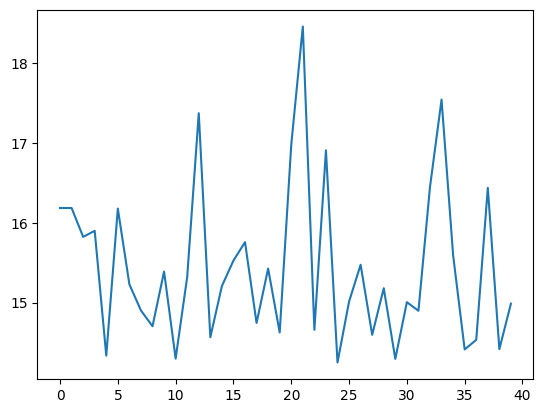

In [57]:
plt.plot(res2) 

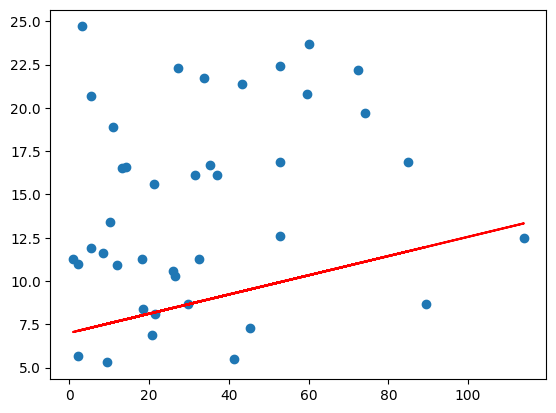

In [58]:
plt.scatter(X2_test, y2_test)
plt.plot(X2_test, 7.00710843 + 0.05548294 * X2_test, 'r')
plt.show()

In [42]:
# It can be confidently concluded that the provided solution effectively predicts sales using the advertising platform dataset.